In [1]:
############################### ELVIS ROJAS ####################################
######### SCRIPT PARA CARGAR DATOS DESDE EL INEI SIN DESCARGAR ARCHIVOS ######
############################### PYTHON ######################################

In [2]:
import pandas as pd
import numpy as np
import requests
from zipfile import ZipFile
from io import BytesIO

In [3]:
pip install pyreadstat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.5 MB 5.2 MB/s 


In [12]:
def get_data_inei(zip_url,number_file):
    r        = requests.get(zip_url)
    z        = ZipFile(BytesIO(r.content))
    zipflies = z.namelist()
    substr = ['.csv', '.dta', '.sav']  
    data_files  =[]
    for i in substr:
        for j in zipflies:
            if(j.find(i)!=-1 and j not in data_files):
                data_files.append(j)
    print('=====================================================================')
    [print(a) for a in data_files]
    print('=====================================================================')
    file_type  = data_files[number_file].split('.')[-1]
    rad       = z.extract(data_files[number_file])

    if file_type == 'sav':
        print(f'file type is .{file_type}')
        print('=====================================================================')
        df       = pd.read_spss(rad)
        print(f'successfully  {data_files[number_file]} file read')
        print('=====================================================================')
    elif file_type == 'csv':
        print(f'file type is .{file_type}')
        print('=====================================================================')
        df       = pd.read_csv(rad,encoding= 'unicode_escape')
        print(f'successfully {data_files[number_file]} file read ')
        print('=====================================================================')         
    elif file_type == 'dta':
        print(f'file type is .{file_type}')
        print('=====================================================================')
        df       = pd.read_stata(rad)
        print(f'successfully {data_files[number_file]} file read ')
        print('=====================================================================')
    return df


**Copiar la direccion de enlace de las encuestas que se desean descargar como entrada para la funcion. **

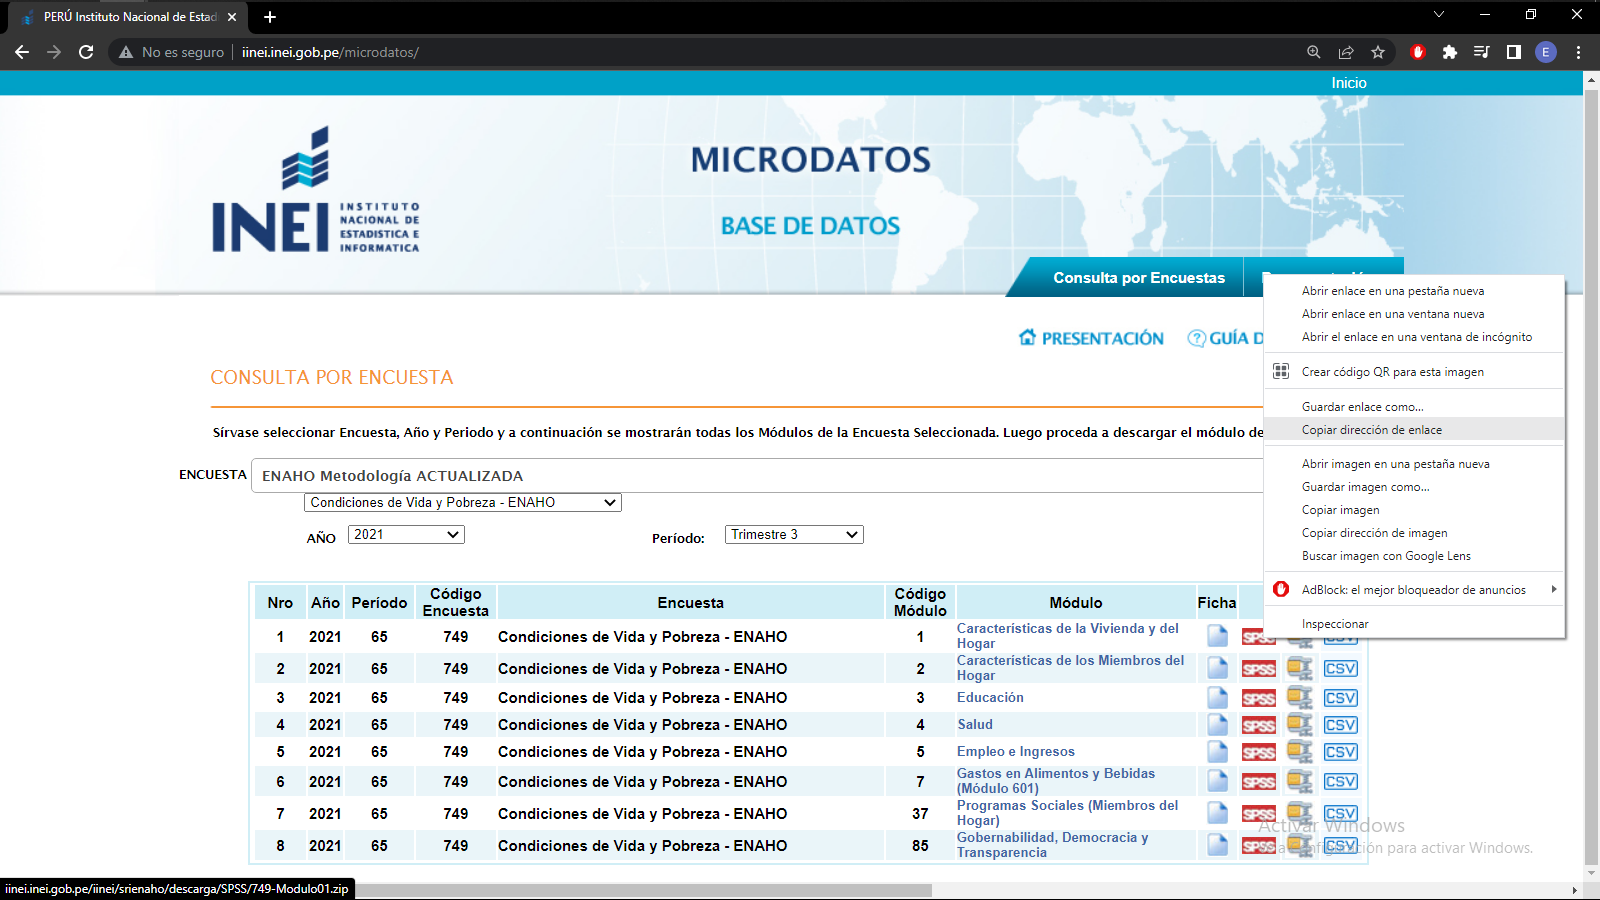

In [13]:
df = get_data_inei('http://iinei.inei.gob.pe/iinei/srienaho/descarga/CSV/749-Modulo03.zip', number_file = 1)
## Puede cambiar el archivo que desea descargar, por ejemplo, en esta encuesta, se lee el segundo archivo .csv ( number_doc = 1 )
## del archivo zip.

749_Modulo03/deflac_trim_movil_2019-Set2021.csv
749_Modulo03/Enaho01A-2021-300.csv
file type is .csv
successfully 749_Modulo03/Enaho01A-2021-300.csv file read 


In [10]:
df.head()

,AÑO,MES,CONGLOME,VIVIENDA,HOGAR,CODPERSO,UBIGEO,DOMINIO,ESTRATO,CODINFOR,...,I311D$4,I311D$5,I311D$6,I311D$7,I3121C,I3122C,I315B,TICUEST01A,TIPODECUESTIONARIO,FACTOR
0,2021,7,5036,14,11,1,10206,7,5,1,...,,,,19,,,,2,2,454.399096
1,2021,7,5036,14,11,2,10206,7,5,2,...,,,,,,,,2,2,514.396152
2,2021,7,5036,14,11,3,10206,7,5,3,...,6,,,,,,,2,2,506.359257
3,2021,7,5036,14,11,4,10206,7,5,3,...,6,,,,,,,2,2,497.220811
4,2021,7,5036,32,11,1,10206,7,5,1,...,,,,,,,,2,2,454.399096
